<a href="https://colab.research.google.com/github/poojitha2730/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPEECH EMOTION  RECOGNITION

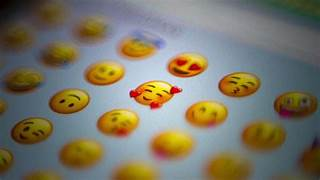

# IMPLEMENTATION


In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

SETTING DATA PATH

In [2]:
train = pd.read_csv("/content/training.csv")
test = pd.read_csv("/content/test.csv")
validation = pd.read_csv("/content/validation.csv")

Lables

In [3]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [4]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

info() provides describetion about data type

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         16000 non-null  object
 1   label        16000 non-null  int64 
 2   description  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
train.isnull().sum()

text           0
label          0
description    0
dtype: int64

In [9]:
test.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
validation.isnull().sum()

text     0
label    0
dtype: int64

# DATA VISUALIZATION

<Axes: >

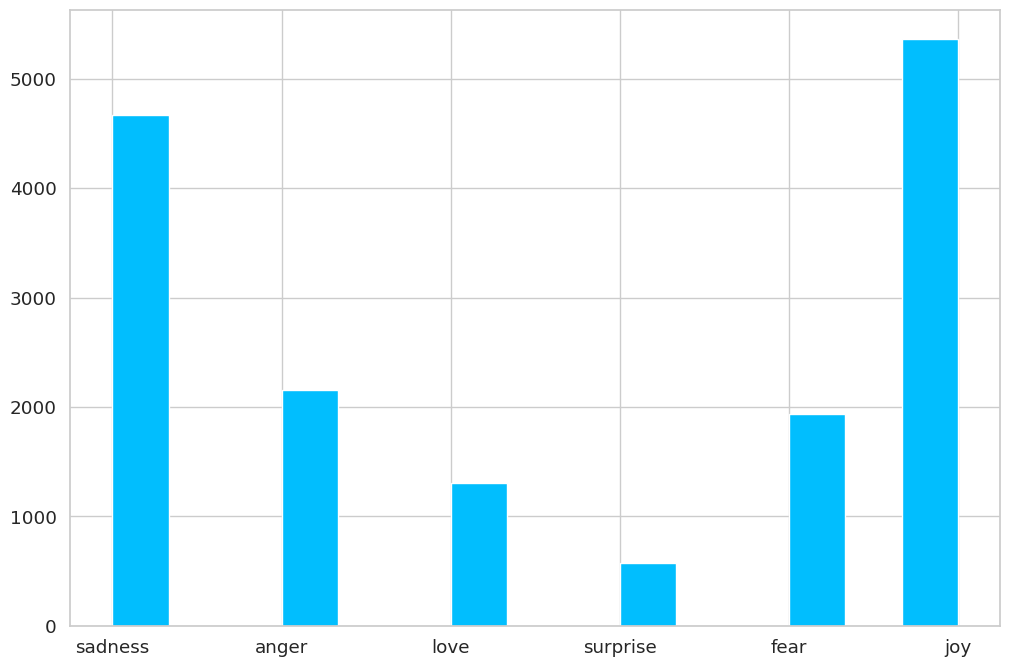

In [11]:
train['description'].hist(bins=15)

In [12]:
train['text_length'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

<ipython-input-13-f3ec8220bda7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['text_length'])


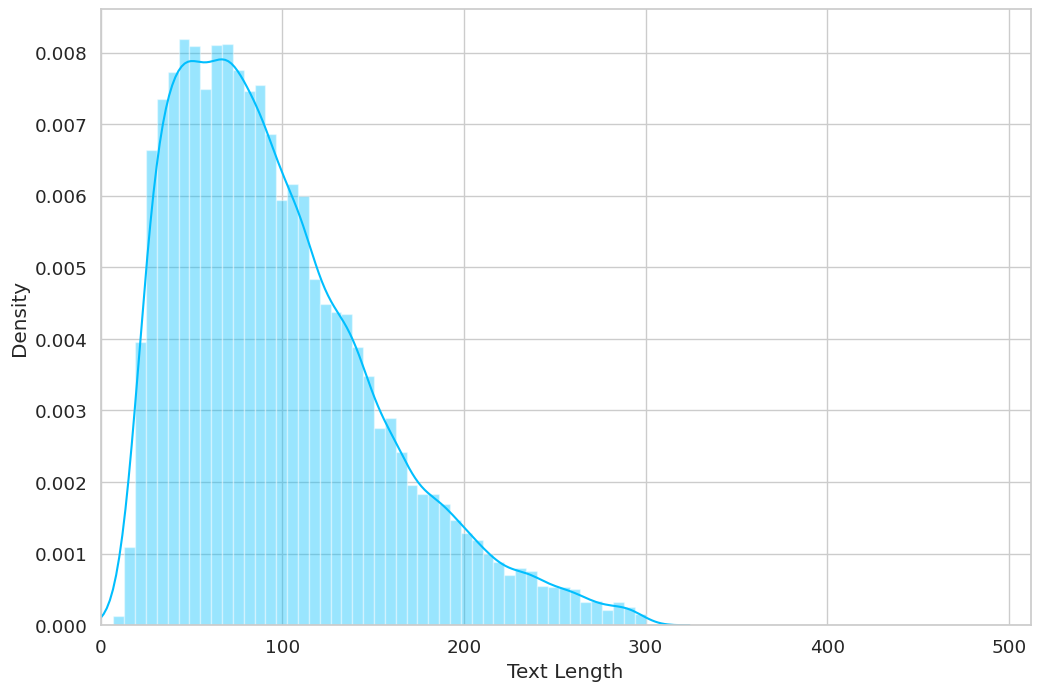

In [13]:
sns.distplot(train['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

<Axes: xlabel='description', ylabel='text_word_count'>

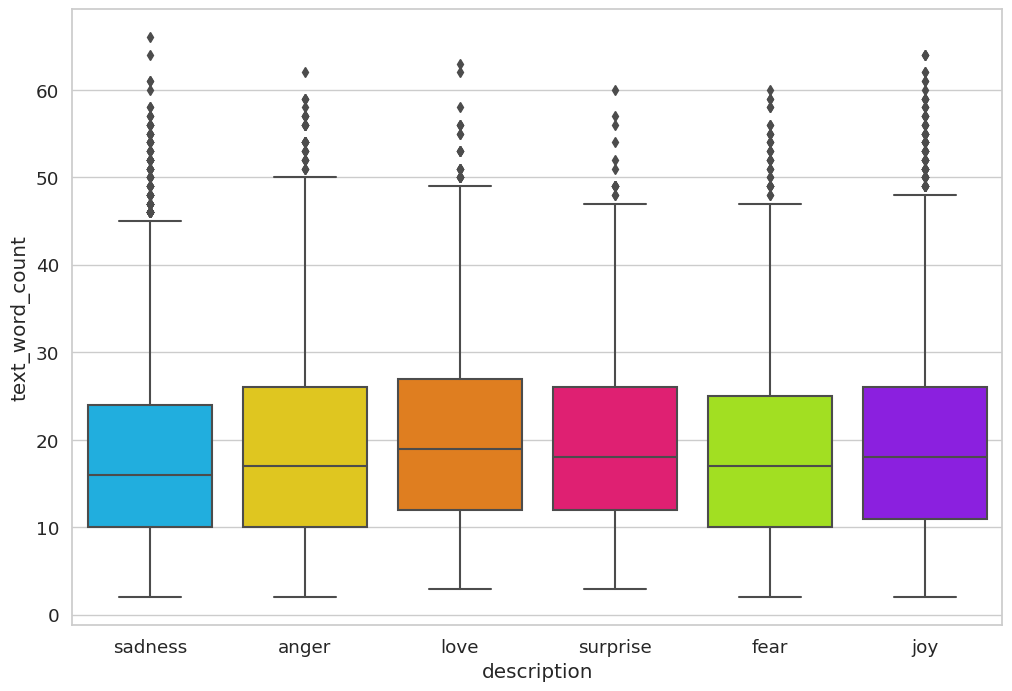

In [14]:
sns.boxplot(x="description", y="text_word_count", data=train)

<Axes: xlabel='description', ylabel='count'>

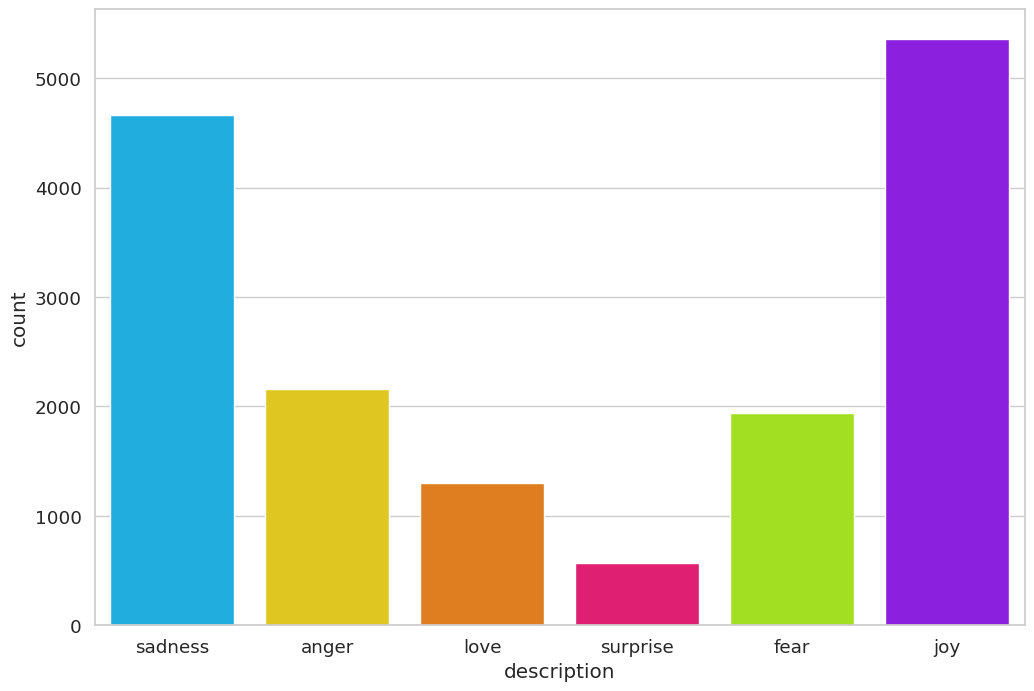

In [15]:
sns.countplot(x="description", data = train)

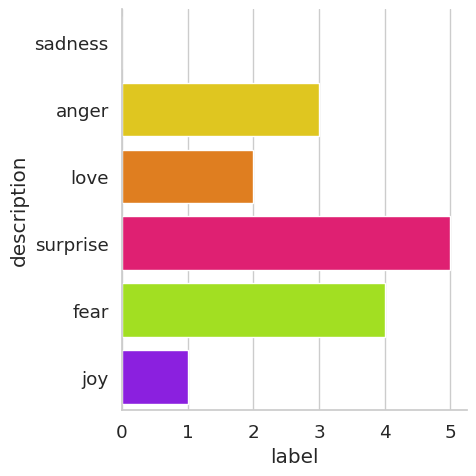

In [16]:
sns.catplot(x="label", y="description",
            kind="bar",
            data=train)

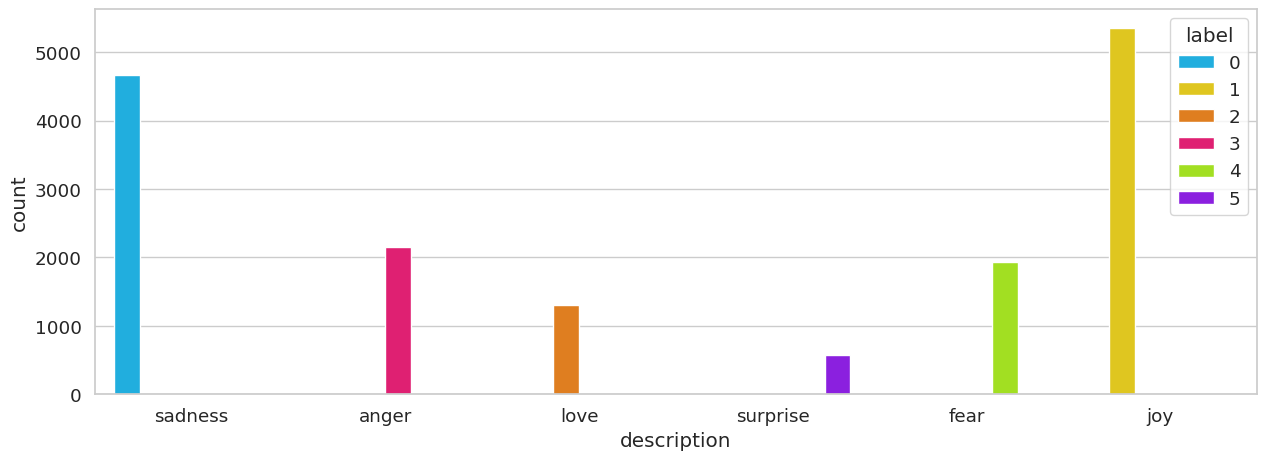

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='description', hue='label', data=train);

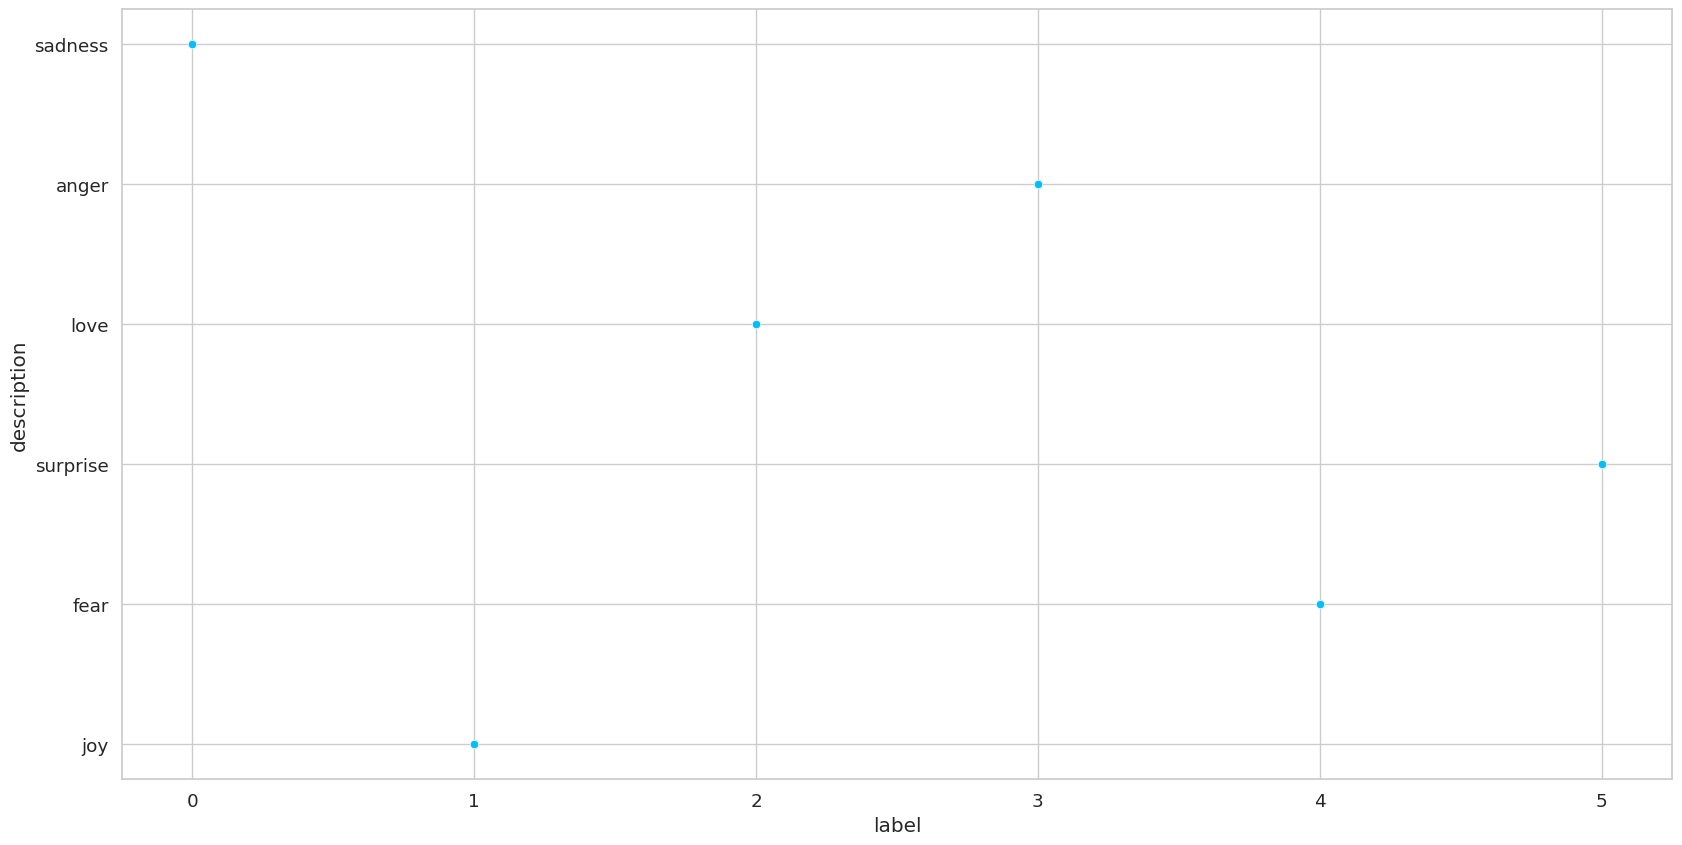

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='label', y='description', data=train)
plt.show()

<Figure size 1000x600 with 0 Axes>

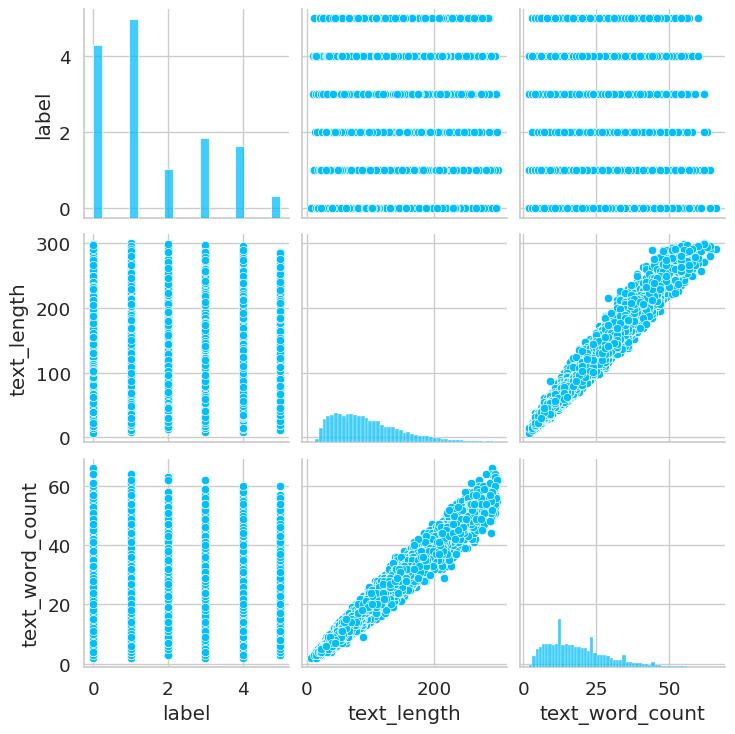

In [19]:
plt.figure(figsize=(10,6))
sns.pairplot(train)
plt.show()

<Axes: >

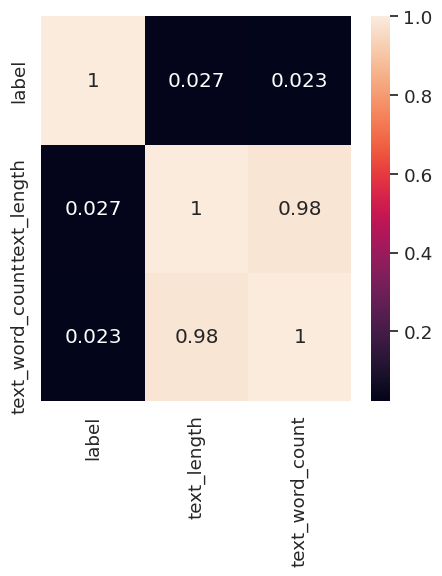

In [20]:
plt.figure(figsize=(5,5))#fig size
train_corel=train.corr()
sns.heatmap(train_corel,annot=True)

#Lets's find Mean,Median,Mode

In [21]:
train.groupby('text_length').median()

,label,text_word_count
text_length,,
7,0.0,2.0
9,3.0,2.0
11,3.0,3.0
12,1.0,3.0
13,2.5,3.0
...,...,...
296,1.0,60.0
297,0.0,56.0
298,2.0,58.5


In [22]:
train.groupby('text_word_count').median()

,label,text_length
text_word_count,,
2,3.0,10.0
3,1.0,15.0
4,1.0,21.0
5,1.0,26.0
6,1.0,31.0
...,...,...
61,0.5,289.0
62,1.5,297.5
63,2.0,295.0


head() provides information

In [23]:
train.head()

,text,label,description,text_length,text_word_count
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18
4,i am feeling grouchy,3,anger,20,4


In [24]:
train.describe()

,label,text_length,text_word_count
count,16000.000000,16000.000000,16000.000000
mean,1.565937,96.845812,19.166313
std,1.501430,55.904953,10.986905
min,0.000000,7.000000,2.000000
25%,0.000000,53.000000,11.000000
50%,1.000000,86.000000,17.000000
75%,3.000000,129.000000,25.000000
max,5.000000,300.000000,66.000000


In [25]:
x=train.iloc[:,2:-1].values
y=train.iloc[:,-1].values
print(x[:10])
print(y[:10])

[['sadness' 23]
 ['sadness' 108]
 ['anger' 48]
 ['love' 92]
 ['anger' 20]
 ['sadness' 65]
 ['surprise' 122]
 ['fear' 73]
 ['joy' 98]
 ['love' 19]]
[ 4 21 10 18  4 12 23 17 19  4]


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12800, 2)
(3200, 2)
(12800,)
(3200,)


In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('english')

stopwords_with_apostrophes = list(stopwords_list)
new_stopwords = ["i'm", "imma", "ain't"]

stopwords_with_apostrophes.extend(new_stopwords)

for word in stopwords_list:
    if "'" in word:
        new_word = word.replace("'", "")
        stopwords_with_apostrophes.append(new_word)

stopwords_list = stopwords_with_apostrophes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
import re
from collections import Counter

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
emoji_counts = Counter()
for message in train['description']:
    message = str(message)
    for char in message:
        emojis = re.findall(emoji_pattern, char)
        emoji_counts.update(emojis)

emoji_counts.most_common()[:25]

[]